<a href="https://colab.research.google.com/github/proishan11/notebooks/blob/master/imdb_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers

Using TensorFlow backend.


In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [0]:
from keras.datasets import imdb

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
len(set(train_labels))

2

In [9]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [0]:
index_to_word = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
index_to_word[447]

'several'

In [0]:
decoded_review = ' '.join([index_to_word.get(i-3, '?') for i in train_data[0]])

In [13]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:
def vectorize_sequence(sequences, dim=10000):
  res = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences):
    # print(sequence)
    res[i, sequence] = 1
  return res


In [15]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[1, 14, 9, 669, 6, 65, 44, 4, 1790, 649, 200, 1808, 2, 2005, 1342, 5, 2, 1662, 3930, 4113, 59, 304, 35, 4181, 4034, 8, 1808, 11, 6, 1420, 2794, 23, 4, 8225, 7, 4, 2, 8, 2, 5, 6, 1207, 168, 54, 29, 5932, 11, 41, 2816, 137, 5963, 2736, 90, 23, 6, 2909, 7, 588, 36, 169, 46, 36, 28, 49, 183, 11, 1141, 1371, 35, 1626, 3224, 1082, 2, 6, 1679, 7, 4, 1961, 383, 684, 88, 199, 28, 77, 1021, 8, 2, 37, 4563, 23, 98, 3751, 36, 850, 8, 1684, 257, 85, 17, 36, 1311, 39, 2, 8, 3997, 21, 2, 695, 47, 491, 2, 19, 3408, 2249, 9339, 5, 2, 11, 49, 8834, 9302, 11, 41, 1662, 7359, 11, 2, 59, 853, 47, 8, 1197, 200, 9339, 5, 1808, 2086, 2, 6, 185, 2340, 785, 255, 82, 304, 35, 5118, 4034, 8, 1808, 21, 64, 214, 3503, 8232, 5722, 11, 994, 246, 59, 3775, 19, 90, 11, 27, 4136, 39, 2, 8, 3997, 5, 27, 4983, 187, 3997, 367, 19, 2, 59, 2, 90, 145, 8, 3365, 103, 1808, 9, 317, 18, 351, 34, 2, 2, 33, 27, 1818, 2308, 2345, 9036, 17, 1022, 2465, 17, 2, 196, 58, 4133, 29, 152, 28, 6, 2, 217, 21, 2465, 8, 2, 2, 254, 8115, 27, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]
[1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 4, 65, 55, 73, 11, 346, 14

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[1, 50, 9, 6, 282, 8, 683, 14, 6, 1629, 509, 46, 7, 1245, 614, 757, 13, 62, 276, 12, 1198, 11, 4, 2521, 12, 9, 727, 4, 116, 9, 527, 262, 4, 1403, 555, 5, 752, 32, 334, 12, 9, 1165, 727, 4, 277, 9, 38, 5667, 15, 13, 144, 28, 317, 402, 5, 279, 12, 62, 28, 2116, 34, 4, 96, 100, 25, 683, 4, 915, 485, 6, 2, 13, 2134, 48, 12, 66, 575, 294, 11, 61, 396, 7795, 62, 28, 301, 38, 417, 11, 4, 396, 13, 2083, 56, 11, 60, 151, 4, 856, 707, 69, 120, 8137, 1537, 75, 100, 28, 1637, 46, 6, 2, 40, 2, 17, 112, 6, 7865, 5, 75, 62, 28, 2, 41, 46, 7, 4, 2293, 61, 477, 681, 9, 607, 129, 58, 54, 12, 266, 23, 248, 106, 142, 128, 40, 4, 2053, 4414]
[1, 13, 2209, 2292, 5864, 3754, 17, 404, 8, 294, 4, 85, 251, 5, 59, 197, 15, 12, 16, 35, 1032, 96, 8, 1634, 6, 20, 10, 10, 13, 28, 110, 64, 6, 3516, 7, 102, 15, 13, 62, 683, 404, 3754, 9, 31, 2, 1563, 3088, 34, 670, 5304, 9, 160, 5, 280, 725, 6, 58, 11, 4, 1263, 34, 8020, 2, 9, 82, 160, 22, 15, 13, 104, 6883, 3203, 50, 26, 6, 171, 409, 21, 1212, 39, 4, 192, 15, 13, 16

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
# vectorize labels
# labels aready 1 or 0 (only float conversion required)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
y_train[0]

1.0

In [18]:
type(y_train[0])

numpy.float32

In [19]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer=optimizers.Adagrad(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.6100 - binary_accuracy: 0.7524 - val_loss: 0.5282 - val_binary_accuracy: 0.8329
Epoch 2/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.4642 - binary_accuracy: 0.8742 - val_loss: 0.4440 - val_binary_accuracy: 0.8628
Epoch 3/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.3886 - binary_accuracy: 0.8969 - val_loss: 0.3976 - val_binary_accuracy: 0.8722
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.3405 - binary_accuracy: 0.9078 - val_loss: 0.3686 - val_binary_accuracy: 0.8746
Epoch 5/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.3071 - binary_accuracy: 0.9174 - val_loss: 0.3460 - val_binary_accuracy: 0.8792
Epoch 6/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2820 - binary_accuracy: 0.9233 - val_loss: 0.3310 - val_b

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [24]:
print(history_dict.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


In [0]:
epochs = range(1, len(history_dict['binary_accuracy']) + 1)

In [26]:
print(len(epochs))

20


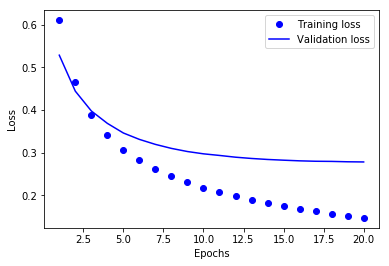

In [27]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 73us/step


In [29]:
results

[0.29527097403526303, 0.88128]